# Data exploration

In [1]:
import numpy as np
import pandas as pd

x_train_path = "data/book_rating_train.csv"
x_train_original = pd.read_csv(x_train_path, index_col = False, delimiter = ',', header=0)
train_corpus_name = x_train_original['Name']
test_name = x_train_original['Name']

x_train_original

,Name,Authors,PublishYear,PublishMonth,PublishDay,Publisher,Language,pagesNumber,Description,rating_label
0,Best of Dr Jean: Reading & Writing,Jean R. Feldman,2005,6,1,Teaching Resources,NaN,48,Teachers will turn to this treasury of ideas a...,4.0
1,Here All Dwell Free,Gertrud Mueller Nelson,1991,10,1,DoubleDay,NaN,364,Every human being lives a fairy tale -- an unc...,4.0
2,Boomer's Big Surprise,Constance W. McGeorge,2005,3,31,Chronicle Books,NaN,32,<i>Boomer's Big Surprise</i> will have special...,4.0
3,"I'll Go and Do More: Annie Dodge Wauneka, Nava...",Carolyn Niethammer,2004,9,1,Bison Books,NaN,293,<i>I'll Go and Do More</i> is the story of Ann...,4.0
4,Us,Richard Mason,2005,7,7,Penguin Books Ltd,eng,352,"Since their days at Oxford, they've gone their...",3.0
...,...,...,...,...,...,...,...,...,...,...
23058,Black Coffee Blues,Henry Rollins,1997,8,1,2.13.61,eng,120,"""If I lose the light of the sun, I will write ...",4.0
23059,America's Champion Swimmer: Gertrude Ederle,David A. Adler,2005,6,1,HMH Books for Young Readers,NaN,32,"Trudy Ederle loved to swim, and she was determ...",4.0
23060,Crime and Custom in Savage Society,Bronisław Malinowski,1989,2,15,Rowman & Littlefield Publishers,NaN,132,Bronislaw Malinowski achieved international re...,4.0
23061,The Name and Nature of Poetry and Other Select...,A.E. Housman,1998,4,21,New Amsterdam Books,NaN,136,Lovers of Housman's poetry and admirers of his...,4.0


## check the distribution of rating

4.0    16208
3.0     5864
5.0      991
Name: rating_label, dtype: int64

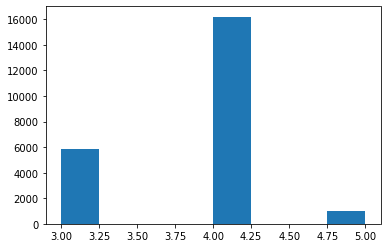

In [2]:
import matplotlib.pyplot as plt
plt.hist(x_train_original['rating_label'], bins=8)

x_train_original['rating_label'].value_counts()

###  the classification is imbalanced, perhaps data augmentation?

average length of name:  41.5
count    23063.000000
mean        41.503967
std         26.104456
min          1.000000
25%         21.000000
50%         36.000000
75%         56.000000
max        255.000000
Name: Name, dtype: float64


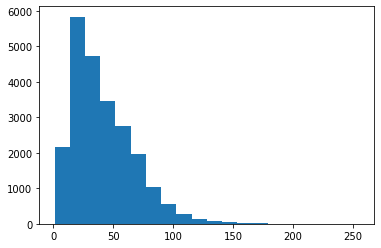

In [3]:
# check the distribution of the length of the text 
# # NOTE: len of string, not words
print('average length of name: ', round(np.mean(train_corpus_name.apply(lambda x: len(x))), 2))
print(x_train_original.Name.apply(lambda x: len(x)).describe())
p1 = plt.hist(x_train_original.Name.apply(lambda x: len(x)), bins=20)
plt.show()

average length of Authors:  14.25
count    23063.000000
mean        14.245111
std          3.522586
min          2.000000
25%         12.000000
50%         14.000000
75%         16.000000
max         47.000000
Name: Authors, dtype: float64


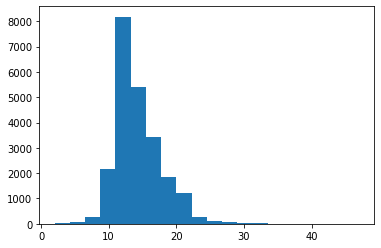

In [4]:
print('average length of Authors: ', round(np.mean(x_train_original.Authors.apply(lambda x: len(x))), 2))
print(x_train_original.Authors.apply(lambda x: len(x)).describe())
p2 = plt.hist(x_train_original.Authors.apply(lambda x: len(x)), bins=20)
plt.show()

average length of Description:  779.77
count    23063.000000
mean       779.773013
std        623.717111
min          2.000000
25%        339.000000
50%        659.000000
75%       1052.000000
max      27754.000000
Name: Description, dtype: float64


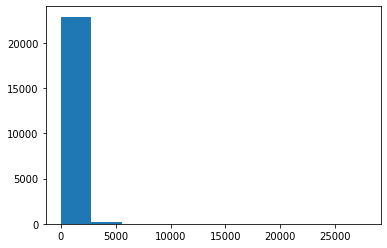

In [5]:
print('average length of Description: ', round(np.mean(x_train_original.Description.apply(lambda x: len(x))), 2))
print(x_train_original.Description.apply(lambda x: len(x)).describe())
p3 = plt.hist(x_train_original.Description.apply(lambda x: len(x)), bins=10)
plt.show()

### And for SVM, it's good for high dimensional data, so probably it's good for combining all the doc2vec (name, author, description...) together (perhaps 200+ dimensions..) when we use the SVM.